-------------load the model-----------------


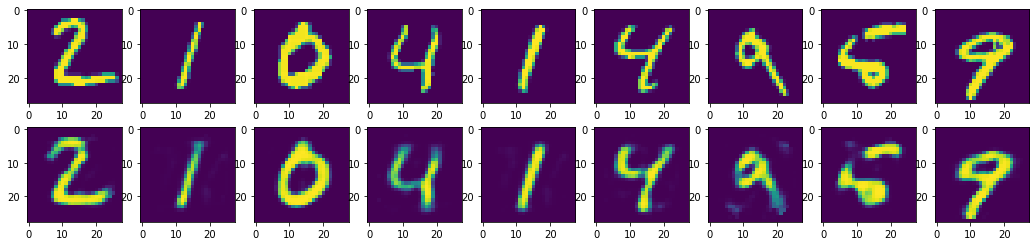

In [2]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

x_train = tf.cast(x_train, tf.float32) / 255.
x_test = tf.cast(x_test, tf.float32) / 255.

input_size = 784
hidden_size = 32
output_size = 784

# 创建layers Input
input_layer = tf.keras.layers.Input(shape=(input_size,))

# 编码器
en = tf.keras.layers.Dense(hidden_size, activation="relu")
en = en(input_layer)

# 解码器
de = tf.keras.layers.Dense(output_size, activation="sigmoid")
de = de(en)

model = tf.keras.Model(inputs=input_layer, outputs=de)

model.compile(
    optimizer="adam",
    loss="mse"
)

# 训练模型
checkpoint_save_path = "./model.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)
else:
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

    model.fit(x_train, x_train, batch_size=256, epochs=50, shuffle=True, 
        validation_data=(x_test, x_test),
        callbacks=[cp_callback]
    )

# 测试模型
encode = tf.keras.Model(inputs=input_layer, outputs=en)

input_de = tf.keras.layers.Input(shape=(hidden_size,))
output_de = model.layers[-1](input_de)

decode = tf.keras.Model(inputs=input_de, outputs=output_de)

encode_test = encode(x_test)
# print(encode_test)

decode_test = decode.predict(encode_test)
# print(decode_test)

n = 10
plt.figure(figsize=(20, 4))

x_test = x_test.numpy()

for i in range(1, n):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decode_test[i].reshape(28, 28))


In [3]:
np.random()

TypeError: 'module' object is not callable